In [255]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from stargazer.stargazer import Stargazer


warnings.filterwarnings("ignore")

In [256]:
df = pd.read_csv('morg-2014-emp.csv')

In [257]:
df.info()  # two columns(ethnic and unioncov) missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149316 entries, 0 to 149315
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  149316 non-null  int64  
 1   hhid        149316 non-null  int64  
 2   intmonth    149316 non-null  object 
 3   stfips      149316 non-null  object 
 4   weight      149316 non-null  float64
 5   earnwke     149316 non-null  float64
 6   uhours      149316 non-null  int64  
 7   grade92     149316 non-null  int64  
 8   race        149316 non-null  int64  
 9   ethnic      20071 non-null   float64
 10  age         149316 non-null  int64  
 11  sex         149316 non-null  int64  
 12  marital     149316 non-null  int64  
 13  ownchild    149316 non-null  int64  
 14  chldpres    149316 non-null  int64  
 15  prcitshp    149316 non-null  object 
 16  state       149316 non-null  object 
 17  ind02       149316 non-null  object 
 18  occ2012     149316 non-null  int64  
 19  cl

In [258]:
# select occupations: all types of teachers, occ2012 from 2200 to 2340
df.loc[((df['occ2012'] >= 2200) & (df['occ2012'] <= 2340)), 'sample'] = 1
# Extract the data information of the selected occupation
df = df.loc[df['sample'] == 1, :].reset_index(drop=True)

In [259]:
len(df)  # Total number of teachers

8278

In [260]:
# target value of this task
df['earn_per_hour'] = df['earnwke'] / df['uhours']
df['lnw'] = np.log(df['earn_per_hour'])

In [261]:
# distribution of earning
df.loc[:, ['earnwke', 'uhours', 'earn_per_hour']].describe()

,earnwke,uhours,earn_per_hour
count,8278.000000,8278.000000,8278.000000
mean,993.516006,39.145567,25.605661
std,586.851367,10.964558,20.748074
min,0.230000,1.000000,0.004107
25%,583.232500,40.000000,15.734182
50%,923.000000,40.000000,22.500000
75%,1250.000000,40.000000,31.110833
max,2884.610000,99.000000,1076.920000


In [262]:
df['female'] = (df['sex'] == 2).astype(int)  # 1: female  0: male
df['agesq'] = np.square(df['age'])

### 参照老师给的范例 "ch10-gender-earnings-multireg.ipynb" 确认一下：

1. 这里是否混淆 # 0: male  1: female  因为回归出来结果系数为负 按照尝试女性每小时收入应该比男的低
2. age power 应该是 agesq
3. y,就是变量earn_per_hour要用np.log取对数值


<AxesSubplot:xlabel='female', ylabel='count'>

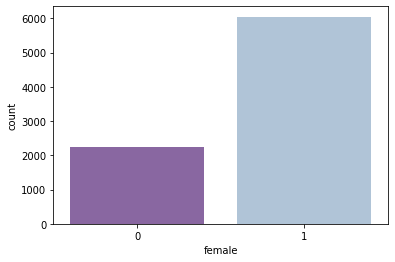

In [263]:
# sex count
sns.countplot(x='female', data=df, palette='BuPu_r')

In [264]:
# linear regression model one
reg1 = smf.ols(formula='lnw~female', data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     150.4
Date:                Sat, 02 Oct 2021   Prob (F-statistic):           2.84e-34
Time:                        17:16:55   Log-Likelihood:                -7133.4
No. Observations:                8278   AIC:                         1.427e+04
Df Residuals:                    8276   BIC:                         1.428e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2132      0.012    264.928      0.000       3.189       3.237
female        -0.1740      0.014    -12.263      0.000      -0.202      -0.146
==============================================================================
Omnibus:                     3624.823   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112353.405
Skew:                          -1.479   Prob(JB):                         0.00
Kurtosis:                      20.804   Cond. No.                         3.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [265]:
# linear regression model two
reg2 = smf.ols(formula='lnw~female+age', data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     403.8
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          4.54e-168
Time:                        17:16:55   Log-Likelihood:                -6822.5
No. Observations:                8278   AIC:                         1.365e+04
Df Residuals:                    8275   BIC:                         1.367e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6705      0.024    109.684      0.000       2.623       2.718
female        -0.1744      0.014    -12.762      0.000      -0.201      -0.148
age            0.0130      0.001     25.408      0.000       0.012       0.014
==============================================================================
Omnibus:                     4098.660   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162415.100
Skew:                          -1.697   Prob(JB):                         0.00
Kurtosis:                      24.433   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
# linear regression model three
reg3 = smf.ols(formula='lnw~female+age+agesq', data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     362.3
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          4.61e-221
Time:                        17:16:55   Log-Likelihood:                -6697.2
No. Observations:                8278   AIC:                         1.340e+04
Df Residuals:                    8274   BIC:                         1.343e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5165      0.076     19.895      0.000       1.367       1.666
female        -0.1811      0.013    -13.446      0.000      -0.208      -0.155
age            0.0726      0.004     19.259      0.000       0.065       0.080
agesq         -0.0007   4.42e-05    -15.950      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     4264.570   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190464.739
Skew:                          -1.765   Prob(JB):                         0.00
Kurtosis:                      26.232   Cond. No.                     2.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [267]:
# linear regression model four
reg4 = smf.ols(formula='lnw~female+age+agesq+grade92', data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     485.2
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:16:55   Log-Likelihood:                -6335.7
No. Observations:                8278   AIC:                         1.268e+04
Df Residuals:                    8273   BIC:                         1.272e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4306      0.161    -15.085      0.000      -2.746      -2.115
female        -0.1406      0.013    -10.833      0.000      -0.166      -0.115
age            0.0496      0.004     13.383      0.000       0.042       0.057
agesq         -0.0005   4.32e-05    -10.806      0.000      -0.001      -0.000
grade92        0.1024      0.004     27.476      0.000       0.095       0.110
==============================================================================
Omnibus:                     4730.249   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           288088.706
Skew:                          -1.973   Prob(JB):                         0.00
Kurtosis:                      31.630   Cond. No.                     6.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 参照老师给的范例 "ch10-gender-earnings-multireg.ipynb" 的Table 10.2的In[14]和Out[14]：


   用stargazer做一张四个回归的对比图

In [268]:
# Model comparison
models = ['model1', 'model2', 'model3', 'model4']
rmse = [np.sqrt(reg1.mse_resid), np.sqrt(reg2.mse_resid), np.sqrt(reg3.mse_resid), np.sqrt(reg4.mse_resid)]
bic = [reg1.bic, reg2.bic, reg3.bic, reg4.bic]

In [269]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(
    ['female', 'age', 'agesq', 'grade92', 'Intercept']
)
stargazer.rename_covariates({'Intercept': 'Constant'})
stargazer

### 参照老师给的范例 "ch10-gender-earnings-multireg.ipynb" 的Table 10.2的In[43]和Out[43]：


   能写出fold和model对应的值

In [270]:
k = KFold(n_splits=5, shuffle=False, random_state=None)
from sklearn.metrics import mean_squared_error

In [271]:
def cv_reg(formula, data, kfold):
    regression_list = []
    predicts_on_test = []
    rsquared = []
    rmse_list = []

    # Calculating OLS for each fold
    for train_index, test_index in k.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data.iloc[train_index, :], data.iloc[test_index, :]
        model = smf.ols(formula, data=data_train).fit()
        regression_list += [model]
        predicts_on_test += [model.predict(data_test)]
        rsquared += [model.rsquared]
        
        a = data_train[formula.split('~')[0]]
        b = model.predict()
        rmse_list += [np.sqrt(mean_squared_error(a, b))]

    return {
        'regressions': regression_list,
        'test_predict': predicts_on_test,
        'r2': rsquared,
        'rmse': rmse_list,
    }


def summarize_cv(cvlist, stat='rmse'):
    result = pd.DataFrame(
        {'Model' + str(x + 1): cvlist[x][stat] for x in range(len(cv_list))}
    )
    result['Resample'] = ['Fold' + str(x + 1) for x in range(len(cvlist[0]['rmse']))]
    result = result.set_index('Resample')
    result = pd.concat([result, pd.DataFrame(result.mean(), columns=['Average']).T])
    return result

In [272]:
cv1 = cv_reg('lnw~female', df, k)
cv2 = cv_reg('lnw~female+age', df, k)
cv3 = cv_reg('lnw~female+age+agesq', df, k)
cv4 = cv_reg('lnw~female+age+agesq+grade92', df, k)
cv_list = [cv1, cv2, cv3, cv4]

In [273]:
summarize_cv(cv_list)

,Model1,Model2,Model3,Model4
Fold1,0.578529,0.557624,0.549325,0.526864
Fold2,0.574243,0.553590,0.545193,0.521988
Fold3,0.580424,0.560317,0.552638,0.528998
Fold4,0.570011,0.547188,0.538870,0.515884
Fold5,0.560472,0.539243,0.530459,0.506657
Average,0.572736,0.551592,0.543297,0.520078


In [274]:
print('From left to right the model gradually becomes more complex.')
print('RMSE in the full sample:', rmse)
print('BIC in the full sample: ', bic)

From left to right the model gradually becomes more complex.
RMSE in the full sample: [0.5728775845093982, 0.5517922142669944, 0.5435332611433402, 0.5203428999831659]
BIC in the full sample:  [14284.918959449797, 13672.081697809106, 13430.42740270809, 12716.558843990508]


In [275]:
# relationship between model complexity and performance

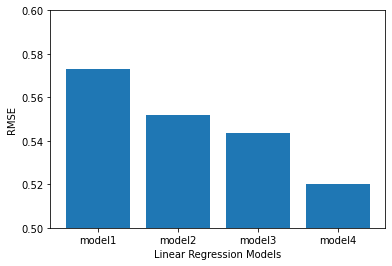

In [276]:
# RMSE in the full sample
plt.bar(models, rmse)
plt.xlabel('Linear Regression Models')
plt.ylabel('RMSE')
plt.ylim([0.5, 0.6])
plt.show()

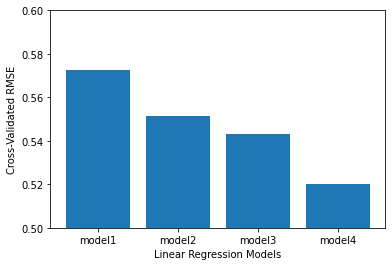

In [282]:
plt.bar(models, [np.mean(cv1['rmse']), np.mean(cv2['rmse']), np.mean(cv3['rmse']), np.mean(cv4['rmse'])])
plt.xlabel('Linear Regression Models')
plt.ylabel('Cross-Validated RMSE')
plt.ylim([0.5, 0.6])
plt.show()

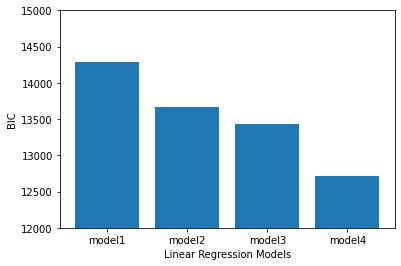

In [283]:
# BIC in the full sample
plt.bar(models, bic)
plt.xlabel('Linear Regression Models')
plt.ylabel('BIC')
plt.ylim([12000, 15000])
plt.show()

In [ ]:
# 需要写在pdf的
模型1选择性别作为predictor，Why？因为从对社会就业以及男女性工作能力分析得出，性别会对工资产生不小的影响。
模型2在模型1的基础上添加年龄作为predictors。根据常识，不同年龄段的人工作能力差别大，且同一个人在不同年龄会拿到不同的工资。
模型3在模型2的基础上添加了年龄的平方作为predictors。猜测增加年龄的平方会产生一些影响。
模型4在模型3的基础上添加了grade92作为predictors，grade92表示这个人完成的最高学历。根据一般知识我们知道，一个人的学历越高，
那么ta很可能拿到更多的工资。

结果分析：
前提知识，模型的BIC，RMSE评价指标越小表示模型的预测能力越好。从上三图可以看出，和为什么选择这些因素理由吻合。从模型1到模型2，可以看出rmse
和bic均下降很多，模型3在模型2的基础上小幅度下降，增加最高学历信息后，模型4在所有模型中表现最优。